### Conditions given

(10, 512, 512)
(10, 514, 514)


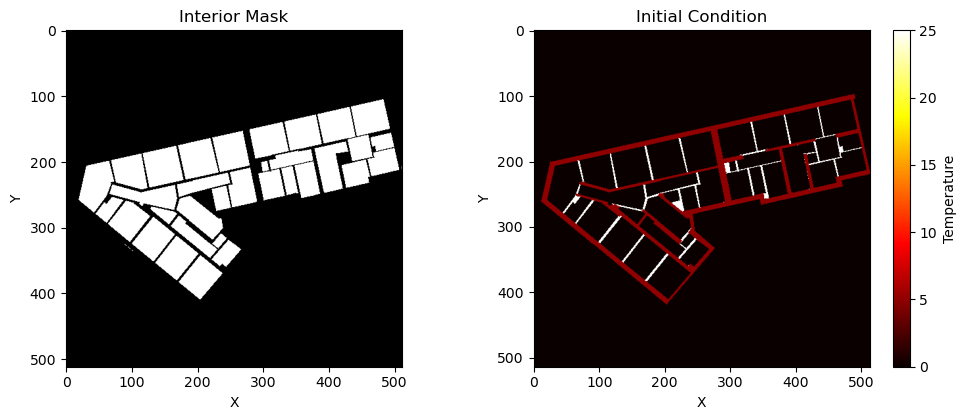

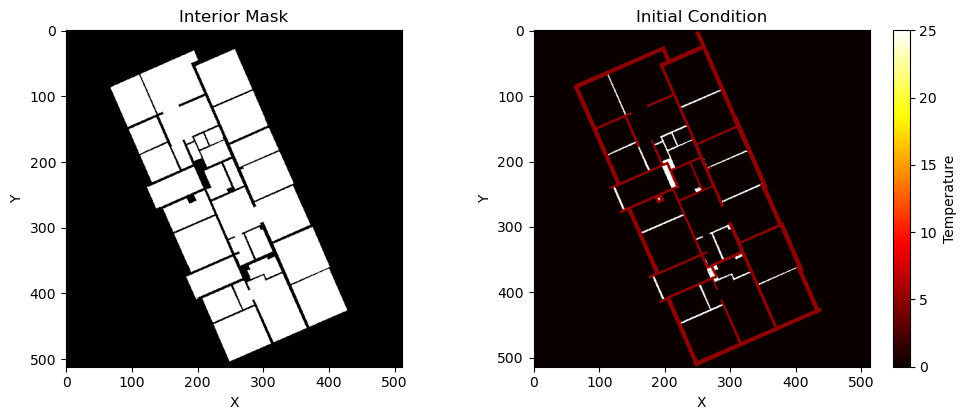

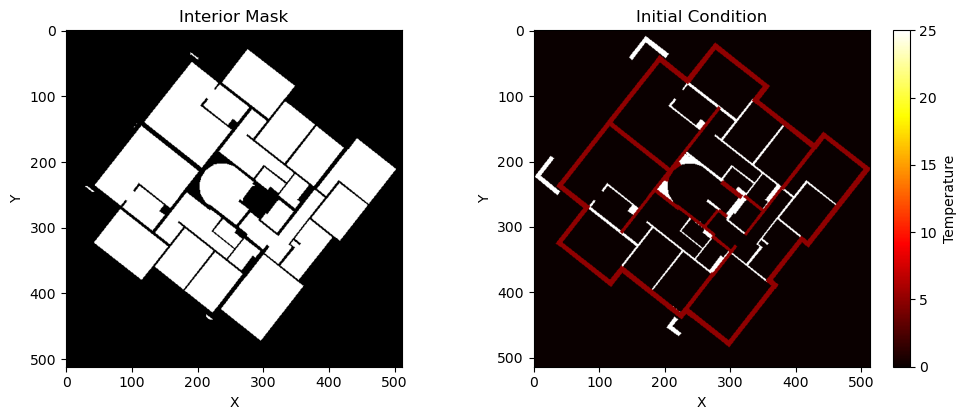

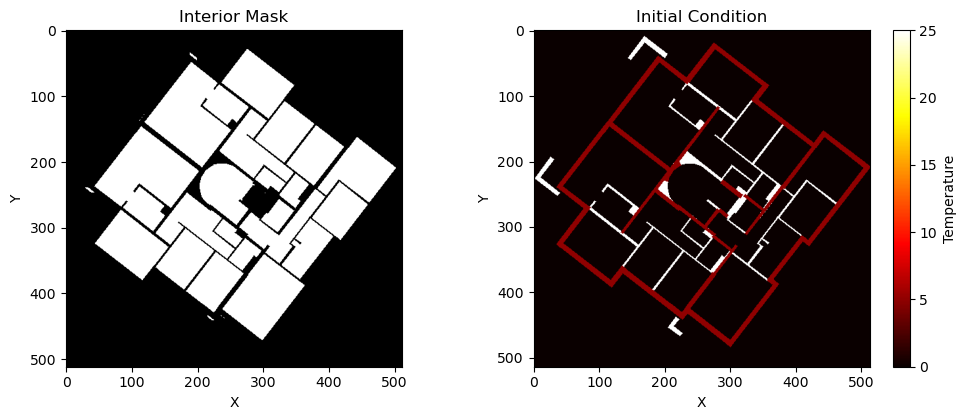

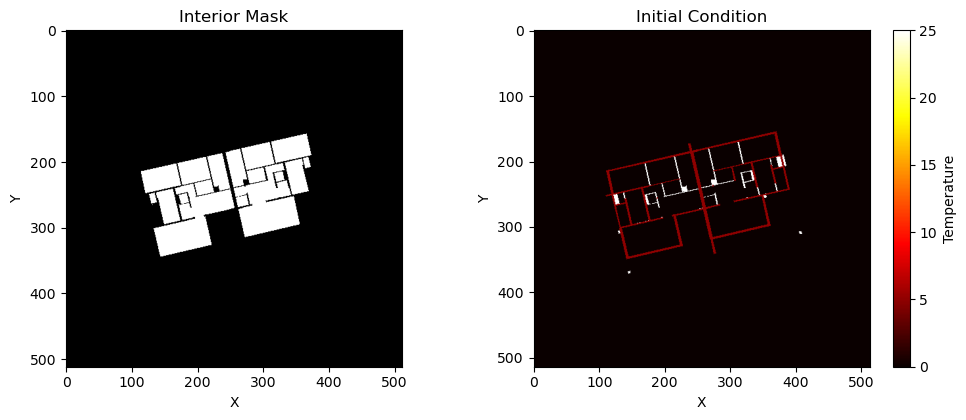

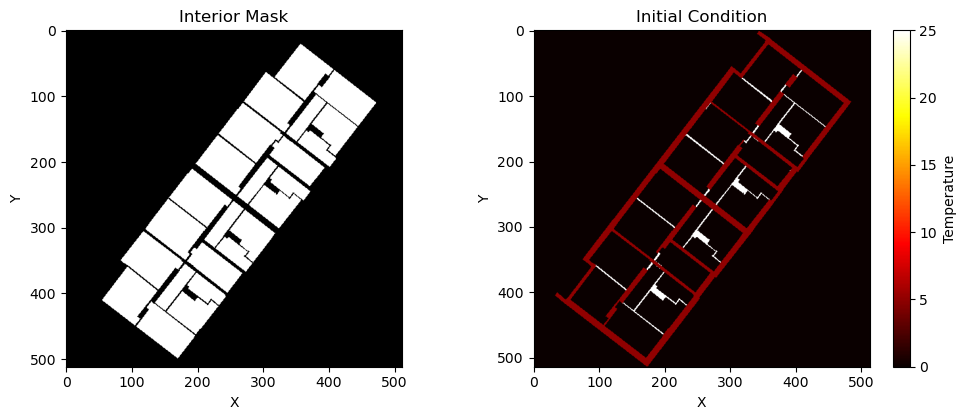

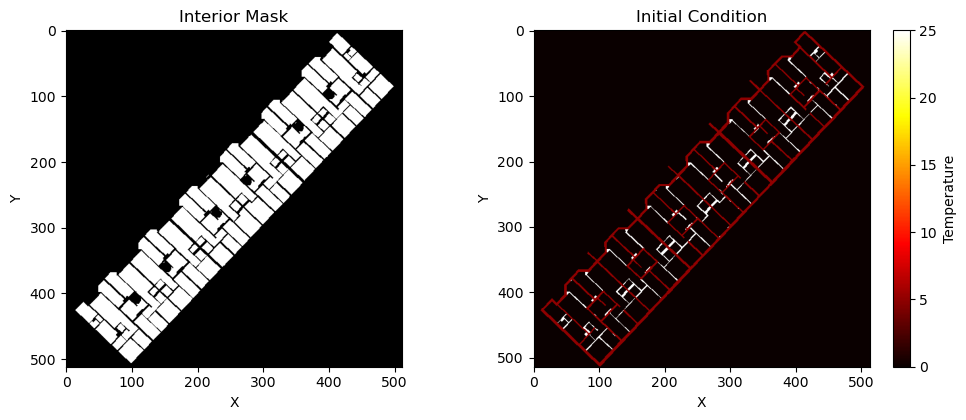

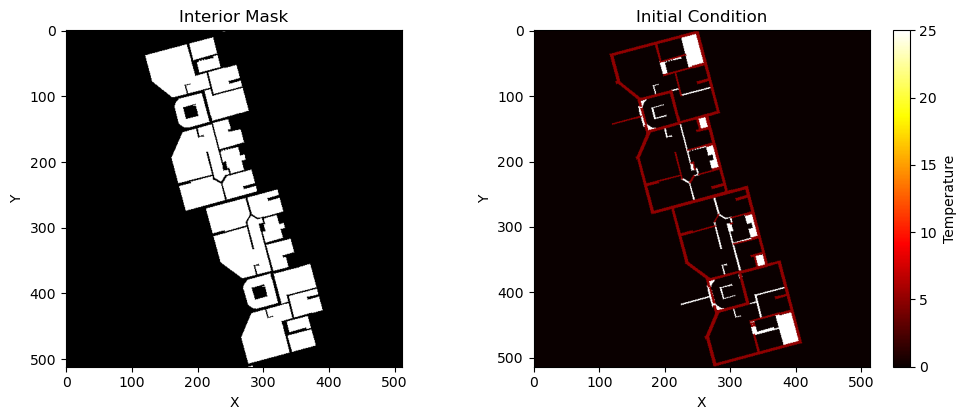

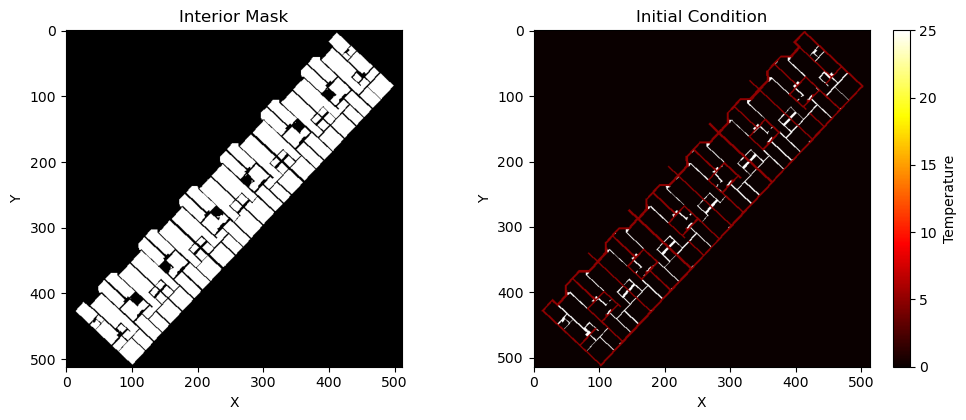

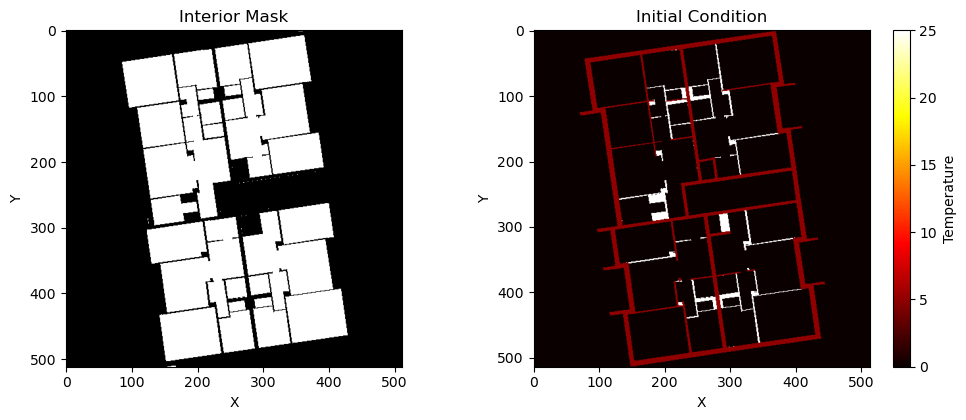

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_u_directory = r"/Users/lottealstrup/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Studie/Intro to AI/Github/Python_and_HPC/"

interior_mask = f'{all_u_directory}interior_masks.npy'
initial_condition = f'{all_u_directory}initial_conditions.npy'

#Shapes
print(np.load(interior_mask).shape) # (512, 512)
print(np.load(initial_condition).shape) # (514, 514)


# Load the intial condition and interior mask
load_interior = np.load(interior_mask, mmap_mode='r')
load_initial = np.load(initial_condition, mmap_mode='r')


for i in range(load_interior.shape[0]):
    # Create subplots for the two start grids
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjusted figsize to make plots smaller

    # Plot interior mask
    axs[0].imshow(load_interior[i, :, :], cmap='gray')
    axs[0].set_title('Interior Mask')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')

    # Plot initial condition
    im1 = axs[1].imshow(load_initial[i, :, :], cmap='hot')
    axs[1].set_title('Initial Condition')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    fig.colorbar(im1, ax=axs[1], orientation='vertical', label='Temperature')

    plt.tight_layout(pad=0)  # Reduced padding to make space between plots smaller
    
    plt.show()




### Initial Results

In [2]:
results = f'{all_u_directory}simulate_results_initial.npy'
print(np.load(results).shape) # (3, 514, 514)
load_results = np.load(results, mmap_mode='r')

for i in range(load_results.shape[0]):
    # Plot simulation results
    plt.imshow(load_results[i, :, :], cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title(f'Simulation Results')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lottealstrup/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Studie/Intro to AI/Github/Python_and_HPC/simulate_results_initial.npy'

**Task 5.a Speedup Plot**

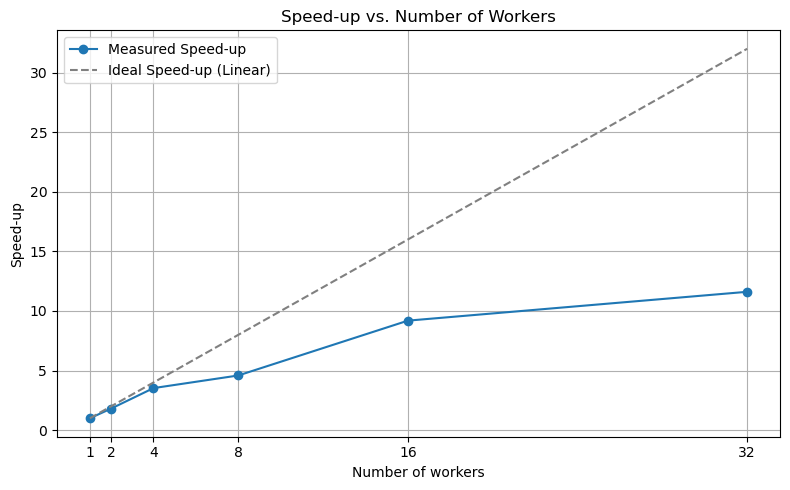

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
csv_path = "/Users/lottealstrup/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Studie/Intro to AI/Github/Python_and_HPC/speedup_results.csv"
df = pd.read_csv(csv_path)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df["Workers"], df["Speed-up"], marker='o', label="Measured Speed-up")
plt.plot(df["Workers"], df["Workers"], linestyle='--', color='gray', label="Ideal Speed-up (Linear)")

plt.title("Speed-up vs. Number of Workers")
plt.xlabel("Number of workers")
plt.ylabel("Speed-up")
plt.xticks(df["Workers"])
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot before showing it
plt.savefig("speedup_plot.png")  # You can also use .pdf, .svg, etc.
plt.show()
